In [2]:
import pandas as pd
from arch import arch_model
# import jqdatasdk as jq
import numpy as np
import time,datetime
import os
import statsmodels.api as sm
# from arch import arch_model

In [228]:
# jq.auth('13918852005','960312Lsc')
# jq.auth('15821912507','912507')

In [8]:
# 引入日历效应哑变量 - 星期
sample_df = pd.read_csv('E:/Stock_Data/stock_return_data/001896.XSHE.csv',index_col=0)
trade_day_serises = list(sample_df.index)

trade_day_df = pd.DataFrame(trade_day_serises)
trade_day_df.columns = ['weekday']
trade_day_df['weekday'] = trade_day_df['weekday'].apply(lambda x : datetime.datetime.strptime(x, "%Y-%m-%d").weekday()+1)

dummy_df = pd.get_dummies(trade_day_df['weekday'])
dummy_df = dummy_df[[1,2,3,4,5]]
dummy_df.index = sample_df.index
dummy_df.to_csv('E:/Stock_Data/dummy_df.csv',index=True)

In [49]:
# 引入日历效应变量 - 假日
sample_df = pd.read_csv('E:/Stock_Data/stock_return_data/001896.XSHE.csv',index_col=0)
trade_day_serises = list(sample_df.index)

trade_day_df = pd.DataFrame(trade_day_serises)
trade_day_df.columns = ['holiday']
trade_day_df['holiday'] = trade_day_df['holiday'].apply(lambda x : datetime.datetime.strptime(x, "%Y-%m-%d"))

# 节前1
# trade_day_df['holiday_1'] = trade_day_df['holiday'].shift(1)
# trade_day_df['holiday'] = trade_day_df['holiday'] - trade_day_df['holiday_1']
# 节后-1
trade_day_df['holiday_1'] = trade_day_df['holiday'].shift(-1)
trade_day_df['holiday'] =  trade_day_df['holiday_1'] - trade_day_df['holiday']

trade_day_df = trade_day_df.fillna(1)
trade_day_df['holiday'] = trade_day_df['holiday'].apply(lambda x : int(str(x)[:2]))

trade_day_df.iloc[0,0] = 1

holiday_df = trade_day_df[['holiday']]
holiday_df.index = sample_df.index
holiday_df.to_csv('E:/Stock_Data/holiday_df.csv',index=True)

In [50]:
# 引入日历效应变量 - 月份
sample_df = pd.read_csv('E:/Stock_Data/stock_return_mon_index/CYBZ.csv',index_col=0)
trade_day_serises = list(sample_df.index)

trade_day_df = pd.DataFrame(trade_day_serises)
trade_day_df.columns = ['Month']
trade_day_df['Month'] = trade_day_df['Month'].apply(lambda x : x[5:7])

dummy_df_M = pd.get_dummies(trade_day_df['Month'])
dummy_df_M.index = sample_df.index
dummy_df_M.to_csv('E:/Stock_Data/dummy_df_M.csv',index=True)

In [12]:
# 无风险利率
rf = pd.read_csv('E:/Stock_Data/rf.csv',index_col=0)

In [4]:
# 指数角度检验 - 周历效应 - 全时段

index_save_dct = {1:0,2:0,3:0,4:0,5:0}
index_p_save_dct = {1:0,2:0,3:0,4:0,5:0}
for index_file in ['SZCZ_lnr_rv_w_m_ntd_080101-','SZZS_lnr_rv_w_m_ntd_080101-','CYBZ_lnr_rv_w_m_ntd_100601-']:
    index_df = pd.read_csv('C:/Users/jxjsj/Desktop/JupyterHome/Data/'+index_file+'190131adj.csv',index_col=0)

    index_df = index_df[index_df.index>'2011-01-04']
    index_df = index_df[index_df.index<'2018-12-28']
    X = dummy_df.iloc[:1943,:]
    y = index_df[['lnR']]
    
    # 是否使用超额收益率
    y.columns = ['return']
#     y = y - rf

    # 用OLS
#     X = sm.add_constant(X)
    est = sm.OLS(y,X)
    result = est.fit()
    for i in range(5):
        index_save_dct[i+1] = '%.6f' %list(result.params)[i]
    for i in range(5):
        index_p_save_dct[i+1] = '%.6f' %list(result.pvalues)[i]
    f_p = '%.6f' %result.f_pvalue
    print('指数',index_file[:4],'\n系数',index_save_dct,'\nP值',index_p_save_dct,'\nF统计量P值',f_p)

    # 用arch
    # reg = arch_model(y, x=X, mean='ARX', lags=0, vol='Garch', p=1, o=0, q=1, power=1, dist='ged', hold_back=None)
    # result = reg.fit()
    # result.summary()

指数 SZCZ 
系数 {1: '-0.000783', 2: '0.000949', 3: '0.000169', 4: '-0.002108', 5: '0.000301'} 
P值 {1: '0.352362', 2: '0.250988', 3: '0.837120', 4: '0.010647', 5: '0.715876'} 
F统计量P值 0.082460
指数 SZZS 
系数 {1: '-0.000226', 2: '0.000664', 3: '0.000213', 4: '-0.001696', 5: '0.000688'} 
P值 {1: '0.750851', 2: '0.341403', 3: '0.758506', 4: '0.014909', 5: '0.324896'} 
F统计量P值 0.093651
指数 CYBZ 
系数 {1: '0.000321', 2: '0.001084', 3: '0.000801', 4: '-0.002286', 5: '0.000290'} 
P值 {1: '0.755526', 2: '0.283907', 3: '0.425059', 4: '0.023571', 5: '0.774437'} 
F统计量P值 0.131635


In [13]:
cnt = 0
for index_file in ['SZCZ_lnr_rv_w_m_ntd_080101-','SZZS_lnr_rv_w_m_ntd_080101-','CYBZ_lnr_rv_w_m_ntd_100601-']:
    index_df = pd.read_csv('C:/Users/jxjsj/Desktop/JupyterHome/Data/'+index_file+'190131adj.csv',index_col=0)
    index_df = index_df[index_df.index>'2011-01-04']
    index_df = index_df[index_df.index<'2018-12-28']
    y = index_df[['lnR']]
    if cnt == 0:
        save_df = y
        save_df.columns=[index_file[:4]]
    else:
        save_df_temp = y
        save_df_temp.columns=[index_file[:4]]
        save_df=pd.concat([save_df,save_df_temp],axis=1)
    cnt += 1

In [16]:
save_df.describe().to_csv('E:/Stock_Data/describe_data/index_lnR.csv')

In [6]:
# 检验日历效应是否来自于rf
est = sm.OLS(rf,X)
result = est.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.01316
Date:                Wed, 03 Apr 2019   Prob (F-statistic):               1.00
Time:                        13:52:25   Log-Likelihood:                 18174.
No. Observations:                1943   AIC:                        -3.634e+04
Df Residuals:                    1938   BIC:                        -3.631e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1              0.0001   1.08e-06    109.279      0.0

In [31]:
# 指数角度检验 - 周历效应 - 分时段

for time in range(3):
    
    start = str(2011+time)+'-01-04'
    end = '2018-12-28'
    
#     if time ==0:
#         start = '2011-01-04'
#         end = '2014-12-31'
#     if time ==1:
#         start = '2014-12-31'
#         end = '2015-12-31'
#     if time ==2:
#         start = '2012-12-31'
#         end = '2018-12-31'
#     if time ==3:
#         start = '2014-01-01'
#         end = '2017-12-31'
#     if time ==4:
#         start = '2015-01-01'
#         end = '2018-12-31'
    
    index_save_dct = {1:0,2:0,3:0,4:0,5:0}
    index_p_save_dct = {1:0,2:0,3:0,4:0,5:0}
    for index_file in ['SZCZ_lnr_rv_w_m_ntd_080101-','SZZS_lnr_rv_w_m_ntd_080101-','CYBZ_lnr_rv_w_m_ntd_100601-']:
        index_df = pd.read_csv('C:/Users/jxjsj/Desktop/JupyterHome/Data/'+index_file+'190131adj.csv',index_col=0)

        index_df = index_df[index_df.index>start]
        index_df = index_df[index_df.index<end]
        X = dummy_df[dummy_df.index>start]
        X = X[X.index<end]
        y = index_df[['lnR']]

        # 用OLS
        # 是否使用超额收益率
        temp_y = pd.merge(y,rf,left_index=True,right_index=True,how='left').fillna(rf.mean())
        y = temp_y['lnR']-temp_y['return']

        est = sm.OLS(y,X)
        result = est.fit()
        for i in range(5):
            index_save_dct[i+1] = '%.6f' %list(result.params)[i]
        for i in range(5):
            index_p_save_dct[i+1] = '%.6f' %list(result.pvalues)[i]
        f_p = '%.6f' %result.f_pvalue
        print('时段',time+1,'指数',index_file[:4],'\n系数',index_save_dct,'\nP值',index_p_save_dct,'\nF统计量P值',f_p,'\n')

时段 1 指数 SZCZ 
系数 {1: '-0.000901', 2: '0.000831', 3: '0.000051', 4: '-0.002226', 5: '0.000183'} 
P值 {1: '0.284369', 2: '0.314914', 3: '0.950908', 4: '0.006994', 5: '0.825185'} 
F统计量P值 0.082455 

时段 1 指数 SZZS 
系数 {1: '-0.000344', 2: '0.000546', 3: '0.000095', 4: '-0.001814', 5: '0.000569'} 
P值 {1: '0.628359', 2: '0.434235', 3: '0.891158', 4: '0.009211', 5: '0.415068'} 
F统计量P值 0.093653 

时段 1 指数 CYBZ 
系数 {1: '0.000203', 2: '0.000966', 3: '0.000683', 4: '-0.002405', 5: '0.000172'} 
P值 {1: '0.844184', 2: '0.339700', 3: '0.496462', 4: '0.017264', 5: '0.865276'} 
F统计量P值 0.131619 

时段 2 指数 SZCZ 
系数 {1: '-0.000393', 2: '0.001235', 3: '-0.000045', 4: '-0.002040', 5: '0.000103'} 
P值 {1: '0.667800', 2: '0.170107', 3: '0.959553', 4: '0.023518', 5: '0.909520'} 
F统计量P值 0.141507 

时段 2 指数 SZZS 
系数 {1: '0.000056', 2: '0.000839', 3: '-0.000019', 4: '-0.001626', 5: '0.000568'} 
P值 {1: '0.941960', 2: '0.270175', 3: '0.980106', 4: '0.032688', 5: '0.457323'} 
F统计量P值 0.176199 

时段 2 指数 CYBZ 
系数 {1: '0.000924

In [18]:
# 指数角度检验 - 假日效应 - 全时段 - 节前

index_save_dct = {1:0}
index_p_save_dct = {1:0}
for index_file in ['SZCZ_lnr_rv_w_m_ntd_080101-','SZZS_lnr_rv_w_m_ntd_080101-','CYBZ_lnr_rv_w_m_ntd_100601-']:
    index_df = pd.read_csv('C:/Users/jxjsj/Desktop/JupyterHome/Data/'+index_file+'190131adj.csv',index_col=0)

    index_df = index_df[index_df.index>'2011-01-04']
    index_df = index_df[index_df.index<'2018-12-28']
    X = holiday_df.iloc[:1943,:]
    y = index_df[['lnR']]
    
    # 是否使用超额收益率
    y.columns = ['return']
    y = y - rf

    # 用OLS
    X = sm.add_constant(X)
    est = sm.OLS(y,X)
    result = est.fit()
    index_save_dct[1] = '%.6f' %list(result.params)[1]
    index_p_save_dct[1] = '%.6f' %list(result.pvalues)[1]
    f_p = '%.6f' %result.f_pvalue
    print('指数',index_file[:4],'\n系数',index_save_dct,'\nP值',index_p_save_dct,'\nF统计量P值',f_p)

指数 SZCZ 
系数 {1: '-0.000075'} 
P值 {1: '0.819277'} 
F统计量P值 0.819277
指数 SZZS 
系数 {1: '0.000046'} 
P值 {1: '0.869852'} 
F统计量P值 0.869852
指数 CYBZ 
系数 {1: '0.000555'} 
P值 {1: '0.169069'} 
F统计量P值 0.169069


In [20]:
# 指数角度检验 - 假日效应 - 全时段 - 节后

index_save_dct = {1:0}
index_p_save_dct = {1:0}
for index_file in ['SZCZ_lnr_rv_w_m_ntd_080101-','SZZS_lnr_rv_w_m_ntd_080101-','CYBZ_lnr_rv_w_m_ntd_100601-']:
    index_df = pd.read_csv('C:/Users/jxjsj/Desktop/JupyterHome/Data/'+index_file+'190131adj.csv',index_col=0)

    index_df = index_df[index_df.index>'2011-01-04']
    index_df = index_df[index_df.index<'2018-12-28']
    X = holiday_df.iloc[:1943,:]
    y = index_df[['lnR']]
    
    # 是否使用超额收益率
    y.columns = ['return']
    y = y - rf

    # 用OLS
    X = sm.add_constant(X)
    est = sm.OLS(y,X)
    result = est.fit()
    index_save_dct[1] = '%.6f' %list(result.params)[1]
    index_p_save_dct[1] = '%.6f' %list(result.pvalues)[1]
    f_p = '%.6f' %result.f_pvalue
    print('指数',index_file[:4],'\n系数',index_save_dct,'\nP值',index_p_save_dct,'\nF统计量P值',f_p)

指数 SZCZ 
系数 {1: '0.000356'} 
P值 {1: '0.280485'} 
F统计量P值 0.280485
指数 SZZS 
系数 {1: '0.000424'} 
P值 {1: '0.128210'} 
F统计量P值 0.128210
指数 CYBZ 
系数 {1: '0.000346'} 
P值 {1: '0.390849'} 
F统计量P值 0.390849


In [16]:
# 指数角度检验 - 月历效应 - 全时段
index_save_dct = {1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0}
index_p_save_dct = {1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0}
index_M_csvs = os.listdir('E:/Stock_Data/stock_return_mon_index/')
for index_M_csv in index_M_csvs:
    index_df = pd.read_csv('E:/Stock_Data/stock_return_mon_index/'+index_M_csv,index_col=0)

    X = dummy_df_M
    y = index_df
    
    # 是否使用超额收益率
#     y.columns = ['return']
#     y = y - rf

    # 用OLS
#     X = sm.add_constant(X)
    est = sm.OLS(y,X)
    result = est.fit()
    for i in range(12):
        index_save_dct[i+1] = '%.7f' %list(result.params)[i]
        index_p_save_dct[i+1] = '%.7f' %list(result.pvalues)[i]
        f_p = '%.6f' %result.f_pvalue
#     print('指数',index_M_csv,'\n系数',index_save_dct,'\nP值',index_p_save_dct,'\nF统计量P值',f_p)
    print('指数',index_M_csv,'\nP值',index_p_save_dct,'\nF统计量P值',f_p)

指数 CYBZ.csv 
P值 {1: '0.4245697', 2: '0.1914693', 3: '0.4781058', 4: '0.9346424', 5: '0.2097283', 6: '0.3858935', 7: '0.5524133', 8: '0.7851465', 9: '0.8274198', 10: '0.8941116', 11: '0.8210424', 12: '0.3682128'} 
F统计量P值 0.823302
指数 SZCZ.csv 
P值 {1: '0.1706793', 2: '0.5052851', 3: '0.7746526', 4: '0.7380739', 5: '0.7864885', 6: '0.1254395', 7: '0.4667076', 8: '0.1904186', 9: '0.8704636', 10: '0.7406948', 11: '0.9520211', 12: '0.5340434'} 
F统计量P值 0.770087
指数 SZZS.csv 
P值 {1: '0.4205844', 2: '0.6942073', 3: '0.7024667', 4: '0.5182240', 5: '0.9397226', 6: '0.0756821', 7: '0.5845602', 8: '0.4340589', 9: '0.9551660', 10: '0.5491464', 11: '0.6816082', 12: '0.4010811'} 
F统计量P值 0.812310


In [21]:
# 指数角度检验 - 月历效应 - 全时段
index_save_dct = {1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0}
index_p_save_dct = {1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0}
index_M_csvs = os.listdir('E:/Stock_Data/stock_return_mon_index/')
for index_M_csv in index_M_csvs:
    index_df = pd.read_csv('E:/Stock_Data/stock_return_mon_index/'+index_M_csv,index_col=0)

    X = dummy_df_M[dummy_df_M.index>'2010-12-31']
    y = index_df[index_df.index>'2010-12-31']
    
    # 是否使用超额收益率
#     y.columns = ['return']
#     y = y - rf

    # 用OLS
#     X = sm.add_constant(X)
    est = sm.OLS(y,X)
    result = est.fit()
    for i in range(12):
        index_save_dct[i+1] = '%.7f' %list(result.params)[i]
        index_p_save_dct[i+1] = '%.7f' %list(result.pvalues)[i]
        f_p = '%.6f' %result.f_pvalue
    print('指数',index_M_csv,'\n系数',index_save_dct,'\nP值',index_p_save_dct,'\nF统计量P值',f_p)
#     print('指数',index_M_csv,'\nP值',index_p_save_dct,'\nF统计量P值',f_p)

指数 CYBZ.csv 
系数 {1: '-0.0277877', 2: '0.0456020', 3: '0.0246749', 4: '-0.0028483', 5: '0.0437716', 6: '-0.0301842', 7: '-0.0206582', 8: '-0.0094709', 9: '0.0075732', 10: '0.0046233', 11: '0.0078579', 12: '-0.0313293'} 
P值 {1: '0.4245697', 2: '0.1914693', 3: '0.4781058', 4: '0.9346424', 5: '0.2097283', 6: '0.3858935', 7: '0.5524133', 8: '0.7851465', 9: '0.8274198', 10: '0.8941116', 11: '0.8210424', 12: '0.3682128'} 
F统计量P值 0.823302
指数 SZCZ.csv 
系数 {1: '-0.0365681', 2: '0.0177056', 3: '0.0076007', 4: '0.0088787', 5: '0.0071911', 6: '-0.0409584', 7: '-0.0193491', 8: '-0.0349314', 9: '-0.0043285', 10: '0.0087865', 11: '0.0015970', 12: '0.0165241'} 
P值 {1: '0.1706793', 2: '0.5052851', 3: '0.7746526', 4: '0.7380739', 5: '0.7864885', 6: '0.1254395', 7: '0.4667076', 8: '0.1904186', 9: '0.8704636', 10: '0.7406948', 11: '0.9520211', 12: '0.5340434'} 
F统计量P值 0.770087
指数 SZZS.csv 
系数 {1: '-0.0187689', 2: '0.0091483', 3: '0.0088884', 4: '0.0150457', 5: '0.0017588', 6: '-0.0417070', 7: '-0.0127276',

In [22]:
# 个股角度检验 - 周历效应

code_lst = os.listdir('E:/Stock_Data/stock_return_data')
X = dummy_df.iloc[:1943,:] 
result_save_dct = {1:0,2:0,3:0,4:0,5:0}
cnt = 0
tol_sig = 0
positive = {1:0,2:0,3:0,4:0,5:0}
pvalue_015 = {1:0,2:0,3:0,4:0,5:0}
pvalue_01 = {1:0,2:0,3:0,4:0,5:0}
pvalue_005 = {1:0,2:0,3:0,4:0,5:0}
pvalue_001 = {1:0,2:0,3:0,4:0,5:0}
pvalue_pos = {1:0,2:0,3:0,4:0,5:0}
f_pvalue = 0
Thu_neg = 0
Thu_pos = 0
Thu_tol = 0
Thu_mean_r = []
for code_csv in code_lst:
    y_temp = pd.read_csv('E:/Stock_Data/stock_return_data/'+code_csv,index_col = 0)
    if len(y_temp)<1943:
        continue
    y = y_temp.iloc[:1943,:]
    
    # 用OLS
#     X = sm.add_constant(X)
    # 是否使用超额收益率
#     y = y - rf

#     est = sm.OLS(y,X)
#     result = est.fit()
    
    # pool 面板拼接
#     code_name = pd.DataFrame([code_csv[:-4]]*len(y),index=y.index,columns=['code'])
#     y = pd.concat([y,code_name],axis=1)
#     if cnt ==0 :
#         y_tol = y
#         X_tol = X
#     else:
#         y_tol = pd.concat([y_tol,y],axis=0)
#         X_tol = pd.concat([X_tol,X],axis=0)
    
    # 统计专用
    
#     # 显著结果统计(有显著性水平要求0.15)
#     for i in range(5):
#         if list(result.pvalues)[i]<0.15:
#             pvalue_015[i+1] += 1 
#     # 显著结果统计(有显著性水平要求0.1)
#     for i in range(5):
#         if list(result.pvalues)[i]<0.1:
#             pvalue_01[i+1] += 1          
#     # 显著结果统计(有显著性水平要求0.05)
#     for i in range(5):
#         if list(result.pvalues)[i]<0.05:
#             pvalue_005[i+1] += 1
#     # 显著结果统计(有显著性水平要求0.01)
#     for i in range(5):
#         if list(result.pvalues)[i]<0.01:
#             pvalue_001[i+1] += 1
            
#     # 显著结果中正负统计(有显著性水平要求0.1)
#     for i in range(5):
#         if list(result.pvalues)[i]<0.1 and list(result.params)[i]>0:
#             pvalue_pos[i+1] += 1
    
#     # 最显著结果统计(无显著性水平要求)
#     result_save_dct[np.argmin(list(result.pvalues))+1]+=1    
    
#     # 正负统计-回归、其实就是样本均值
#     for i in range(5):
#         if list(result.params)[i]>0:
#             positive[i+1] += 1
            
#     # F统计量显著统计
#     if result.f_pvalue < 0.1:
#         f_pvalue += 1
    
    # 收集周四收益率数据
#     y_Thu = y[X[4]==1]['return']
#     if cnt == 0:
#         y_Thu_save=y_Thu
#     else:
#         y_Thu_save=pd.concat([y_Thu_save,y_Thu],axis=0)

    # 收集周四平均收益率数据
#     y_Thu = list(result.params)[3]
#     Thu_mean_r.append(y_Thu)
        
#     # 频率统计，周四为负
    y_Thu = y[X[4]==1]['return']
#     y_Thu_std = y_Thu.std()
    Thu_neg += sum(y_Thu.apply(lambda x: 1 if x<0 else 0))
    Thu_pos += sum(y_Thu.apply(lambda x: 1 if x>0 else 0))
    Thu_tol += Thu_neg/Thu_pos
#     # 频率统计，周一为正
#     y_Mon = y[(X[2]==0) & (X[3]==0) & (X[4]==0) & (X[5]==0)]['return']
#     y_Mon_std = y_Mon.std()
#     Mon_pos += sum(y_Mon.apply(lambda x: 1 if x> 3*y_Mon_std else 0))
#     Mon_neg += sum(y_Mon.apply(lambda x: 1 if x<-3*y_Mon_std else 0))
    # 频率统计，平均数正负
    
    # 频率统计，周四小于周一
#     y_Mon = y[(X[2]==0) & (X[3]==0) & (X[4]==0) & (X[5]==0) ]['return']
#     y_Thu = y[X[4]==1]['return']
#     y_delta = y_Thu - y_Mon
#     Thu_lower_Mon += sum(y_delta.apply(lambda x: 1 if x<0 else 0))  
    
    # 用arch
#     reg = arch_model(y, x=X, mean='ARX', lags=0, vol='Garch', p=1, o=0, q=1, power=1, dist='ged', hold_back=None)
#     result = reg.fit()
#     result_save_dct[np.argmin(list(result.pvalues[:5]))+1]+=1
        
    cnt += 1
#     tol_sig += list(result.pvalues)[4]

In [23]:
print('显著结果统计0.15',pvalue_015,'\n显著结果统计0.1',pvalue_01,'\n显著结果统计0.05',pvalue_005,'\n显著结果统计0.01',pvalue_001,'\n显著结果中正负统计',pvalue_pos,'\n最显著结果统计',result_save_dct,'\n回归结果正负统计',positive,'\nF统计量显著数',f_pvalue,'\n总数',cnt)

显著结果统计0.15 {1: 272, 2: 282, 3: 155, 4: 1270, 5: 186} 
显著结果统计0.1 {1: 181, 2: 177, 3: 76, 4: 1085, 5: 105} 
显著结果统计0.05 {1: 88, 2: 86, 3: 33, 4: 721, 5: 43} 
显著结果统计0.01 {1: 17, 2: 10, 3: 4, 4: 237, 5: 8} 
显著结果中正负统计 {1: 33, 2: 176, 3: 74, 4: 0, 5: 82} 
最显著结果统计 {1: 201, 2: 155, 3: 103, 4: 1345, 5: 130} 
回归结果正负统计 {1: 702, 2: 1556, 3: 1477, 4: 22, 5: 991} 
F统计量显著数 596 
总数 1934


In [11]:
print('周四为负',Thu_neg,'周四为正',Thu_pos,'比值',Thu_neg/(Thu_pos+Thu_neg))

周四为负 371413 周四为正 312120 比值 0.5433724487332726


In [13]:
print('周一为负',Thu_neg,'周一为正',Thu_pos,'比值',Thu_neg/(Thu_pos+Thu_neg))

周一为负 302681 周一为正 355457 比值 0.4599050655029796


In [15]:
print('周二为负',Thu_neg,'周二为正',Thu_pos,'比值',Thu_neg/(Thu_pos+Thu_neg))

周二为负 310951 周二为正 368238 比值 0.4578269082685379


In [17]:
print('周三为负',Thu_neg,'周三为正',Thu_pos,'比值',Thu_neg/(Thu_pos+Thu_neg))

周三为负 336493 周三为正 352059 比值 0.4886965690318233


In [19]:
print('周五为负',Thu_neg,'周五为正',Thu_pos,'比值',Thu_neg/(Thu_pos+Thu_neg))

周五为负 328451 周五为正 347062 比值 0.4862245434210741


In [63]:
# 个股角度检验 - 月历效应

code_lst = os.listdir('E:/Stock_Data/stock_return_data_monthly')
result_save_dct = {1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0}
cnt = 0
tol_sig = 0
positive = {1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0}
pvalue_01 = {1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0}
pvalue_005 = {1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0}
pvalue_001 = {1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0}
pvalue_pos = {1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0}
f_pvalue = 0
Thu_neg = 0
Thu_pos = 0
Thu_tol = 0
Thu_mean_r = []
for code_csv in code_lst:
    X_temp = pd.read_csv('E:/Stock_Data/dummy_df_M.csv',index_col=0)
    y_temp = pd.read_csv('E:/Stock_Data/stock_return_data_monthly/'+code_csv,index_col = 0)
    X_temp.index = [month[:7] for month in X_temp.index]
    y_temp.index = [month[:7] for month in y_temp.index]
    X_y = pd.merge(X_temp,y_temp,left_index=True,right_index=True,how='left').fillna(0)
    X = X_y.iloc[:,0:12]
    y = X_y.iloc[:,12]
    
    # 用OLS
#     X = sm.add_constant(X)
    # 是否使用超额收益率
#     y = y - rf

    est = sm.OLS(y,X)
    result = est.fit()
    
    # pool 面板拼接
#     code_name = pd.DataFrame([code_csv[:-4]]*len(y),index=y.index,columns=['code'])
#     y = pd.concat([y,code_name],axis=1)
#     if cnt ==0 :
#         y_tol = y
#         X_tol = X
#     else:
#         y_tol = pd.concat([y_tol,y],axis=0)
#         X_tol = pd.concat([X_tol,X],axis=0)
    
    # 统计专用
    
#     # 显著结果统计(有显著性水平要求0.15)
#     for i in range(5):
#         if list(result.pvalues)[i]<0.15:
#             pvalue_015[i+1] += 1 
    # 显著结果统计(有显著性水平要求0.1)
    for i in range(12):
        if list(result.pvalues)[i]<0.1:
            pvalue_01[i+1] += 1          
    # 显著结果统计(有显著性水平要求0.05)
    for i in range(12):
        if list(result.pvalues)[i]<0.05:
            pvalue_005[i+1] += 1
    # 显著结果统计(有显著性水平要求0.01)
    for i in range(12):
        if list(result.pvalues)[i]<0.01:
            pvalue_001[i+1] += 1
            
    # 显著结果中正负统计(有显著性水平要求0.1)
    for i in range(12):
        if list(result.pvalues)[i]<0.1 and list(result.params)[i]>0:
            pvalue_pos[i+1] += 1
    
#     # 最显著结果统计(无显著性水平要求)
#     result_save_dct[np.argmin(list(result.pvalues))+1]+=1    
    
    # 正负统计-回归、其实就是样本均值
    for i in range(12):
        if list(result.params)[i]>0:
            positive[i+1] += 1

    cnt += 1

In [64]:
print('显著结果统计0.1',pvalue_01,'\n显著结果统计0.05',pvalue_005,'\n显著结果统计0.01',pvalue_001,'\n显著结果中正负统计',pvalue_pos,'\n回归结果正负统计',positive,'\n总数',cnt)

显著结果统计0.1 {1: 220, 2: 104, 3: 91, 4: 146, 5: 224, 6: 553, 7: 155, 8: 74, 9: 80, 10: 64, 11: 31, 12: 92} 
显著结果统计0.05 {1: 86, 2: 36, 3: 37, 4: 76, 5: 145, 6: 384, 7: 92, 8: 38, 9: 45, 10: 32, 11: 18, 12: 35} 
显著结果统计0.01 {1: 9, 2: 3, 3: 6, 4: 33, 5: 58, 6: 162, 7: 26, 8: 6, 9: 10, 10: 7, 11: 5, 12: 5} 
显著结果中正负统计 {1: 2, 2: 104, 3: 75, 4: 29, 5: 50, 6: 2, 7: 12, 8: 24, 9: 21, 10: 34, 11: 20, 12: 35} 
回归结果正负统计 {1: 255, 2: 1720, 3: 1359, 4: 839, 5: 816, 6: 185, 7: 515, 8: 770, 9: 859, 10: 1157, 11: 979, 12: 623} 
总数 1873


In [3]:
initial_df = pd.read_csv('E:/Stock_Data/Fama_beta_Thu.csv')

In [17]:
# 个股负周四效应检验 - 负盈利能力因子风险溢价 - 子集
initial_df = pd.read_csv('E:/Stock_Data/Fama_beta_Thu.csv')
code_list = list(initial_df[initial_df.SMB_beta>0]['Code'])

X = dummy_df.iloc[:1943,:] 
result_save_dct = {1:0,2:0,3:0,4:0,5:0}
cnt = 0
tol_sig = 0
positive = {1:0,2:0,3:0,4:0,5:0}
pvalue_015 = {1:0,2:0,3:0,4:0,5:0}
pvalue_01 = {1:0,2:0,3:0,4:0,5:0}
pvalue_005 = {1:0,2:0,3:0,4:0,5:0}
pvalue_001 = {1:0,2:0,3:0,4:0,5:0}
pvalue_pos = {1:0,2:0,3:0,4:0,5:0}
f_pvalue = 0
Thu_neg = 0
Thu_pos = 0
Thu_tol = 0
Thu_mean_r = []
for code in code_list:
    y_temp = pd.read_csv('E:/Stock_Data/stock_return_data/'+code+'.csv',index_col = 0)
    if len(y_temp)<1943:
        continue
    y = y_temp.iloc[:1943,:]
    
    # 用OLS
#     X = sm.add_constant(X)
    # 是否使用超额收益率
    y = y - rf

    est = sm.OLS(y,X)
    result = est.fit()
    
    # 统计专用
    
    # 显著结果统计(有显著性水平要求0.1)
    for i in range(5):
        if list(result.pvalues)[i]<0.1:
            pvalue_01[i+1] += 1          
    # 显著结果统计(有显著性水平要求0.05)
    for i in range(5):
        if list(result.pvalues)[i]<0.05:
            pvalue_005[i+1] += 1
    # 显著结果统计(有显著性水平要求0.01)
    for i in range(5):
        if list(result.pvalues)[i]<0.01:
            pvalue_001[i+1] += 1
            
    # 正负统计-回归、其实就是样本均值
    for i in range(5):
        if list(result.params)[i]>0:
            positive[i+1] += 1
        
    cnt += 1

In [18]:
print('显著结果统计0.1',pvalue_01,'\n显著结果统计0.05',pvalue_005,'\n显著结果统计0.01',pvalue_001,'\n显著结果中正负统计',pvalue_pos,'\n回归结果正负统计',positive,'\n总数',cnt)

显著结果统计0.1 {1: 174, 2: 169, 3: 71, 4: 983, 5: 91} 
显著结果统计0.05 {1: 85, 2: 84, 3: 33, 4: 662, 5: 34} 
显著结果统计0.01 {1: 15, 2: 10, 3: 4, 4: 215, 5: 7} 
显著结果中正负统计 {1: 0, 2: 0, 3: 0, 4: 0, 5: 0} 
回归结果正负统计 {1: 590, 2: 1438, 3: 1371, 4: 19, 5: 873} 
总数 1747


In [16]:
print('显著结果统计0.1',pvalue_01,'\n显著结果统计0.05',pvalue_005,'\n显著结果统计0.01',pvalue_001,'\n显著结果中正负统计',pvalue_pos,'\n回归结果正负统计',positive,'\n总数',cnt)

显著结果统计0.1 {1: 95, 2: 111, 3: 43, 4: 515, 5: 44} 
显著结果统计0.05 {1: 51, 2: 56, 3: 21, 4: 347, 5: 21} 
显著结果统计0.01 {1: 9, 2: 6, 3: 3, 4: 104, 5: 2} 
显著结果中正负统计 {1: 0, 2: 0, 3: 0, 4: 0, 5: 0} 
回归结果正负统计 {1: 362, 2: 828, 3: 779, 4: 10, 5: 489} 
总数 975


In [5]:
# 个股数据描述性统计 - 忽视个股截面间差异混合描述性统计
code_lst = os.listdir('E:/Stock_Data/stock_return_data')
cnt = 0
for code_csv in code_lst:
    y_temp = pd.read_csv('E:/Stock_Data/stock_return_data/'+code_csv,index_col = 0)
    if len(y_temp)<1943:
        continue
    y = y_temp.iloc[:1943,:]
    # pool 面板拼接
    code_name = pd.DataFrame([code_csv[:-4]]*len(y),index=y.index,columns=['code'])
    y = pd.concat([y,code_name],axis=1)
    if cnt ==0 :
        y_tol = y
    else:
        y_tol = pd.concat([y_tol,y],axis=0)
    cnt+=1

KeyboardInterrupt: 

In [27]:
y_tol.describe().to_csv('E:/Stock_Data/describe_data/indivi_stock_pool.csv')

In [30]:
# 个股数据描述性统计 - 个股平均收益率进行描述性统计
y_tol.groupby('code').mean().describe().to_csv('E:/Stock_Data/describe_data/indivi_stock_mean.csv')

In [32]:
y_tol.to_csv('E:/Stock_Data/all_trade_data.csv',index=True)

In [123]:
# 绘图专用，计算从第一日开始当日期望收益率（仅计算同星期）

tol_need_date_lst = \
list(dummy_df.index)[0:5]+\
list(dummy_df.index)[63:68]+\
list(dummy_df.index)[121:126]+\
list(dummy_df.index)[185:190]+\
list(dummy_df.index)[240:245]+\
list(dummy_df.index)[323:328]+\
list(dummy_df.index)[362:367]+\
list(dummy_df.index)[417:422]+\
list(dummy_df.index)[477:482]+\
list(dummy_df.index)[529:534]

code_lst = os.listdir('E:/Stock_Data/stock_return_data')
X = dummy_df.iloc[:1943,:] 
cnt = 0
for code_csv in code_lst:
    y_temp = pd.read_csv('E:/Stock_Data/stock_return_data/'+code_csv,index_col = 0)
    if len(y_temp)<1943:
        continue
    y = y_temp.iloc[:1943,:]
    y = y - rf
    y_X = pd.merge(y,X,left_index=True,right_index=True)
    date_index = list(y_X.index)
    save_df = pd.DataFrame(columns=['expect_return_Tvalue'],index=tol_need_date_lst)
    for i in range(len(tol_need_date_lst)):
        date=tol_need_date_lst[i]
        weekday = datetime.datetime.strptime(date,'%Y-%m-%d').weekday()+1
        y_X_sub_0 = y_X[y_X.index>date]
        y_X_sub_1 = y_X_sub_0[y_X_sub_0[weekday]==1]['return']
        mean_samp = y_X_sub_1.mean()
        std_samp = y_X_sub_1.std()
        n = len(y_X_sub_1)
        t_value = mean_samp/(std_samp/np.sqrt(n))
        save_df.iloc[i,]=t_value
#         break
    save_df.to_csv('E:/Stock_Data/expect_return_data/'+code_csv,index=True)
#     break

In [125]:
stock_data_T_lst = os.listdir('E:/Stock_Data/expect_return_data/')
sample_df = pd.read_csv('E:/Stock_Data/expect_return_data/'+stock_data_T_lst[0],index_col=0)
save_df = pd.DataFrame(columns=['mean_T'],index=sample_df.index)
date_lst = list(sample_df.index)
for i in range(len(date_lst)):
    date = date_lst[i]
    cnt = 0
    tol_expect_return_T = 0
    for stock_data_T_csv in stock_data_T_lst:
        expect_return_T_df = pd.read_csv('E:/Stock_Data/expect_return_data/'+stock_data_T_csv,index_col=0)
        expect_return_T = expect_return_T_df.iloc[i,0]
        tol_expect_return_T += expect_return_T
        cnt += 1
    save_df.iloc[i,0] = tol_expect_return_T/cnt
save_df.to_csv('E:/Stock_Data/expect_return_T_mean_all.csv',index=True)

In [81]:
from scipy import stats
stats.ttest_1samp(Thu_mean_r, [-(0.0000687+0.001+0.0003+0.0001)])

Ttest_1sampResult(statistic=array([70.89964599]), pvalue=array([0.]))

In [10]:
# pool面板回归
est = sm.OLS(y_tol,X_tol)
result = est.fit()

In [11]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1742.
Date:                Thu, 04 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:17:26   Log-Likelihood:             8.0710e+06
No. Observations:             3757762   AIC:                        -1.614e+07
Df Residuals:                 3757757   BIC:                        -1.614e+07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1             -0.0005   3.31e-05    -14.582      0.0

In [235]:
for code_csv in code_lst:
    y_temp = pd.read_csv('E:/Stock_Data/stock_return_data/'+code_csv,index_col = 0)
    if len(y_temp)<1943:
        continue
    y = y_temp.iloc[:1943,:]
    
    y['return_'] = y.shift(1)
    y = y.dropna()
    
    X = y[['return_']]
    y = y[['return']]
    
    # 用OLS
    X = sm.add_constant(X)

    est = sm.OLS(y,X)
    result = est.fit()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


KeyboardInterrupt: 

In [236]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     6.113
Date:                Fri, 05 Apr 2019   Prob (F-statistic):             0.0135
Time:                        01:36:50   Log-Likelihood:                 4318.5
No. Observations:                1942   AIC:                            -8633.
Df Residuals:                    1940   BIC:                            -8622.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.914e-05      0.001      0.099      0.9

In [197]:
# df_mean=y_tol.groupby('code').mean()[['return']]
# df_mean.columns = ['mean']
# df_std=y_tol.groupby('code').std()[['return']]
# df_std.columns = ['std']

In [203]:
# y_tol_temp_0 = pd.merge(y_tol,df_mean,left_on='code',right_index=True)
# y_tol_temp_1 = pd.merge(y_tol_temp_0,df_std,left_on='code',right_index=True)
# y_tol_temp_1['return'] = (y_tol_temp_1['return']-y_tol_temp_1['mean'])/y_tol_temp_1['std']
# y_tol_ = y_tol_temp_1[['return','code']]

In [183]:
# y_tol['week'] = y_tol.index
# y_tol['week'] = y_tol['week'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d").weekday()+1)

In [225]:
X_tol_sub = X_tol[X_tol.index>'2009-01-01']
y_tol_sub = y_tol_[y_tol_.index>'2009-01-01']

In [218]:
y_tol_sub[y_tol_sub.index=='2018-10-13']

,return,code


In [226]:
# Fama-MacBeth回归检验周期性
param_avg_save=[]
param_std_save=[]

for lag in range(70):
# for lag in [7]:
    
    param = []
    sum_tol = 200
    for i in range(sum_tol):
        
        y_left_year = str(datetime.datetime.strptime('2018-12-27',"%Y-%m-%d") - datetime.timedelta(i*7))[:10] # 仅对周四求和
        y_right_year = str(datetime.datetime.strptime(y_left_year,"%Y-%m-%d") - datetime.timedelta(lag+1))[:10]
        
        if datetime.datetime.strptime(y_left_year,"%Y-%m-%d").weekday()+1==6 or datetime.datetime.strptime(y_right_year,"%Y-%m-%d").weekday()+1==7:
            print(str(lag+1)+'-'+str(i),end='\r')
            continue
        
        y_left = y_tol_sub[y_tol_sub.index==y_left_year]
        y_right = y_tol_sub[y_tol_sub.index==y_right_year]
        
        if len(y_right)==0 or len(y_left)==0:
            print(str(lag+1)+'-'+str(i),end='\r')
            continue
        
        temp_df = pd.merge(y_left,y_right,left_on='code',right_on='code',how='inner')
        Y_left = temp_df['return_x']
        Y_right = temp_df['return_y']
           
        Y_right =  sm.add_constant(Y_right)
        est = sm.OLS(Y_left,Y_right)
        result = est.fit()
        
        param.append(list(result.params)[1])
        
        print(str(lag+1)+'-'+str(i),end='\r')
    
    param_avg_save.append(np.mean(param))
    param_std_save.append(np.std(param))

KeyboardInterrupt: 

In [212]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               return_x   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     5.383
Date:                Fri, 05 Apr 2019   Prob (F-statistic):             0.0204
Time:                        00:46:37   Log-Likelihood:                -2188.0
No. Observations:                1934   AIC:                             4380.
Df Residuals:                    1932   BIC:                             4391.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3640      0.017     21.334      0.0

In [ ]:
pd.DataFrame(param_avg_save).to_csv('C:/Users/jxjsj/Desktop/test.csv')

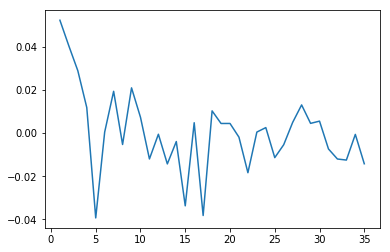

In [224]:
import matplotlib.pyplot as plt
plt.plot(range(1,len(pd.DataFrame(param_avg_save).dropna())+1),pd.DataFrame(param_avg_save).dropna())

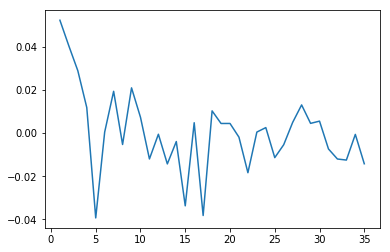

In [223]:
import matplotlib.pyplot as plt
plt.plot(range(1,len(pd.DataFrame(param_avg_save).dropna())+1),pd.DataFrame(param_avg_save).dropna())

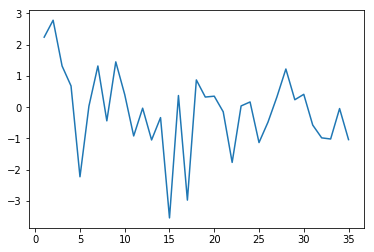

In [222]:
plt.plot(range(1,len(pd.DataFrame(param_std_save).dropna())+1),pd.DataFrame(param_avg_save).dropna()/pd.DataFrame(param_std_save).dropna()*5.5)

In [51]:
y_right =  sm.add_constant(y_right)
y_left = np.array(y_left)
y_right = np.array(y_right)
est = sm.OLS(y_left,y_right)
result = est.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1342
Date:                Thu, 04 Apr 2019   Prob (F-statistic):              0.714
Time:                        18:25:44   Log-Likelihood:                 4715.3
No. Observations:                1934   AIC:                            -9427.
Df Residuals:                    1932   BIC:                            -9415.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0159      0.001    -19.567      0.0

In [12]:
est = sm.OLS(y,X)
result = est.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.052
Date:                Thu, 04 Apr 2019   Prob (F-statistic):              0.379
Time:                        16:19:25   Log-Likelihood:                 4365.5
No. Observations:                1943   AIC:                            -8721.
Df Residuals:                    1938   BIC:                            -8693.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1           3.226e-05      0.001      0.024      0.9

In [24]:
y_right = y.shift(15).dropna(how="any")
y_left = y.iloc[15:,:]

In [25]:
y_right =  sm.add_constant(y_right)
est = sm.OLS(y_left,y_right)
result = est.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1083
Date:                Thu, 04 Apr 2019   Prob (F-statistic):              0.742
Time:                        16:27:33   Log-Likelihood:                 4337.5
No. Observations:                1928   AIC:                            -8671.
Df Residuals:                    1926   BIC:                            -8660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.001     -0.673      0.5

In [28]:
len(X)-7

1936

In [ ]:
# 个股角度检验 - 月历效应 - 哑变量生成

In [ ]:
# 个股角度检验 - 月历效应

code_lst = os.listdir('E:/Stock_Data/stock_return_data_monthly')
X = dummy_df.iloc[:1943,:] 
result_save_dct = {1:0,2:0,3:0,4:0,5:0}
cnt = 0
tol_sig = 0
positive = {1:0,2:0,3:0,4:0,5:0}
pvalue_015 = {1:0,2:0,3:0,4:0,5:0}
pvalue_01 = {1:0,2:0,3:0,4:0,5:0}
pvalue_005 = {1:0,2:0,3:0,4:0,5:0}
pvalue_001 = {1:0,2:0,3:0,4:0,5:0}
pvalue_pos = {1:0,2:0,3:0,4:0,5:0}
f_pvalue = 0
Thu_mean_r = []
for code_csv in code_lst:
    y_temp = pd.read_csv('E:/Stock_Data/stock_return_data/'+code_csv,index_col = 0)
    if len(y_temp)<1943:
        continue
    y = y_temp.iloc[:1943,:]
    
    # 用OLS
#     X = sm.add_constant(X)
    # 是否使用超额收益率
    y = y - rf

#     est = sm.OLS(y,X)
#     result = est.fit()
    
    # pool 面板拼接
    if cnt ==0 :
        y_tol = y
        X_tol = X
    else:
        y_tol = pd.concat([y_tol,y],axis=0)
        X_tol = pd.concat([X_tol,X],axis=0)
    
    # 统计专用
    
#     # 显著结果统计(有显著性水平要求0.15)
#     for i in range(5):
#         if list(result.pvalues)[i]<0.15:
#             pvalue_015[i+1] += 1 
#     # 显著结果统计(有显著性水平要求0.1)
#     for i in range(5):
#         if list(result.pvalues)[i]<0.1:
#             pvalue_01[i+1] += 1          
#     # 显著结果统计(有显著性水平要求0.05)
#     for i in range(5):
#         if list(result.pvalues)[i]<0.05:
#             pvalue_005[i+1] += 1
#     # 显著结果统计(有显著性水平要求0.01)
#     for i in range(5):
#         if list(result.pvalues)[i]<0.01:
#             pvalue_001[i+1] += 1
            
#     # 显著结果中正负统计(有显著性水平要求0.1)
#     for i in range(5):
#         if list(result.pvalues)[i]<0.1 and list(result.params)[i]>0:
#             pvalue_pos[i+1] += 1
    
#     # 最显著结果统计(无显著性水平要求)
#     result_save_dct[np.argmin(list(result.pvalues))+1]+=1    
    
#     # 正负统计-回归、其实就是样本均值
#     for i in range(5):
#         if list(result.params)[i]>0:
#             positive[i+1] += 1
            
#     # F统计量显著统计
#     if result.f_pvalue < 0.1:
#         f_pvalue += 1
    
    # 收集周四收益率数据
#     y_Thu = y[X[4]==1]['return']
#     if cnt == 0:
#         y_Thu_save=y_Thu
#     else:
#         y_Thu_save=pd.concat([y_Thu_save,y_Thu],axis=0)

    # 收集周四平均收益率数据
#     y_Thu = list(result.params)[3]
#     Thu_mean_r.append(y_Thu)
        
#     # 频率统计，周四为负
#     y_Thu = y[X[4]==1]['return']
#     y_Thu_std = y_Thu.std()
#     Thu_neg += sum(y_Thu.apply(lambda x: 1 if x<-3*y_Thu_std else 0))
#     Thu_pos += sum(y_Thu.apply(lambda x: 1 if x> 3*y_Thu_std else 0))
#     # 频率统计，周一为正
#     y_Mon = y[(X[2]==0) & (X[3]==0) & (X[4]==0) & (X[5]==0)]['return']
#     y_Mon_std = y_Mon.std()
#     Mon_pos += sum(y_Mon.apply(lambda x: 1 if x> 3*y_Mon_std else 0))
#     Mon_neg += sum(y_Mon.apply(lambda x: 1 if x<-3*y_Mon_std else 0))
    # 频率统计，平均数正负
    
    # 频率统计，周四小于周一
#     y_Mon = y[(X[2]==0) & (X[3]==0) & (X[4]==0) & (X[5]==0) ]['return']
#     y_Thu = y[X[4]==1]['return']
#     y_delta = y_Thu - y_Mon
#     Thu_lower_Mon += sum(y_delta.apply(lambda x: 1 if x<0 else 0))  
    
    # 用arch
#     reg = arch_model(y, x=X, mean='ARX', lags=0, vol='Garch', p=1, o=0, q=1, power=1, dist='ged', hold_back=None)
#     result = reg.fit()
#     result_save_dct[np.argmin(list(result.pvalues[:5]))+1]+=1
        
    cnt += 1
#     tol_sig += list(result.pvalues)[4]